# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

In [15]:
import pandas as pd
df = pd.read_csv('marketing_campaign.csv', delimiter=';')
df.info()
df.describe()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year_Birth         2240 non-null   int64  
 1   Education          2240 non-null   object 
 2   Marital_Status     2240 non-null   object 
 3   Income             2216 non-null   float64
 4   Kidhome            2240 non-null   int64  
 5   Recency            2240 non-null   int64  
 6   MntWines           2240 non-null   int64  
 7   MntFruits          2240 non-null   int64  
 8   MntMeatProducts    2240 non-null   int64  
 9   MntFishProducts    2240 non-null   int64  
 10  MntSweetProducts   2240 non-null   int64  
 11  MntGoldProds       2240 non-null   int64  
 12  NumStorePurchases  2240 non-null   int64  
 13  NumWebVisitsMonth  2240 non-null   int64  
 14  Complain           2240 non-null   int64  
 15  WebPurchases       2240 non-null   int64  
dtypes: float64(1), int64(13)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumStorePurchases,NumWebVisitsMonth,Complain,WebPurchases
0,1957,Graduation,Single,58138.0,0,58,635,88,546,172,88,88,4,7,0,1
1,1954,Graduation,Single,46344.0,1,38,11,1,6,2,1,6,2,5,0,0
2,1965,Graduation,Together,71613.0,0,26,426,49,127,111,21,42,10,4,0,1
3,1984,Graduation,Together,26646.0,1,26,11,4,20,10,3,5,4,6,0,0
4,1981,PhD,Married,58293.0,1,94,173,43,118,46,27,15,6,5,0,1


In [16]:
# Exploração e Limpeza e storytelling
# Passos que serão abordados com bases nas informações colhidas:
# Passo 1 - Remover os valores nulos de 'Income'
# Passo 2 - Transformar coluna 'Year_Birth' em 'Year' (mais intuitivo)
# Ao verificar a coluna com 'df['WebPurchases'].value_counts()' verificamos que só existem 0 e 1 (comprou e não comprou), o que nos mostra que houve um 
# erro de digitação em 'WebPurchases: Número de compras feitas pelo site da empresa.'.
# A coluna não verifica quantas compras foram feitas e sim se alguma compra foi feita pelo site.
# Passo 3 - conversão de colunas para booleana
# Passo 4 - get.dummies das colunas 'objects'
# Passo 5 - Propor uma engenharia de Features (teste)
# Passo 6 - análise

In [17]:
# Passo 1 - Remover os valores nulos de 'Income'
# Substituição por mediana
median_income = df['Income'].median()
df.fillna({'Income': median_income}, inplace=True)

In [18]:
# Passo 2 - Transformar coluna 'Year_Birth' em 'Year' (mais intuitivo)
df['Age'] = 2025 - df['Year_Birth']
df.drop('Year_Birth', axis=1, inplace=True)

In [19]:
# Passo 3 - conversão de colunas para booleana
df['Complain'] = df['Complain'].astype(bool)
df['WebPurchases'] = df['WebPurchases'].astype(bool)

In [24]:
# Passo 4 - get.dummies das colunas categóricas
df_encoded = pd.get_dummies(df, columns=['Education', 'Marital_Status'], dtype=int)
print(df_encoded.columns)
# Após pesquisa 'Y0L0' é uma forma 'desconstraída' de pessoas excêntricas dizerem que tomam ações impulsivas/fazem o que querem sem pensar nas consequências
# E isso não diz muita coisa para fins estatísticos.

Index(['Income', 'Kidhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumStorePurchases', 'NumWebVisitsMonth', 'Complain',
       'WebPurchases', 'Age', 'Education_2n Cycle', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Absurd', 'Marital_Status_Alone',
       'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Marital_Status_YOLO'],
      dtype='object')


In [25]:
df_encoded['Marital_Status_Alone'].value_counts()

Marital_Status_Alone
0    2237
1       3
Name: count, dtype: int64

In [26]:
df_encoded['Marital_Status_Absurd'].value_counts()


Marital_Status_Absurd
0    2238
1       2
Name: count, dtype: int64

In [27]:
df_encoded['Marital_Status_YOLO'].value_counts()

Marital_Status_YOLO
0    2238
1       2
Name: count, dtype: int64

In [28]:
# É muito difícil agrupar Alone entre single, widow ou divorced, por exemplo. E Absurd ou YOLO em qualquer categoria.
# Como são ocorrências raras, optei por dropar.
df_encoded.drop(columns=['Marital_Status_Alone', 
                         'Marital_Status_Absurd', 
                         'Marital_Status_YOLO'], inplace=True)

In [30]:
# Passo 5 - Propor uma engenharia de Features
# A criação de uma coluna que englobe os gastos de todas as categorias 
df_encoded['Total_Spent'] = df_encoded['MntWines'] + df_encoded['MntFruits'] + \
                            df_encoded['MntMeatProducts'] + df_encoded['MntFishProducts'] + \
                            df_encoded['MntSweetProducts'] + df_encoded['MntGoldProds']

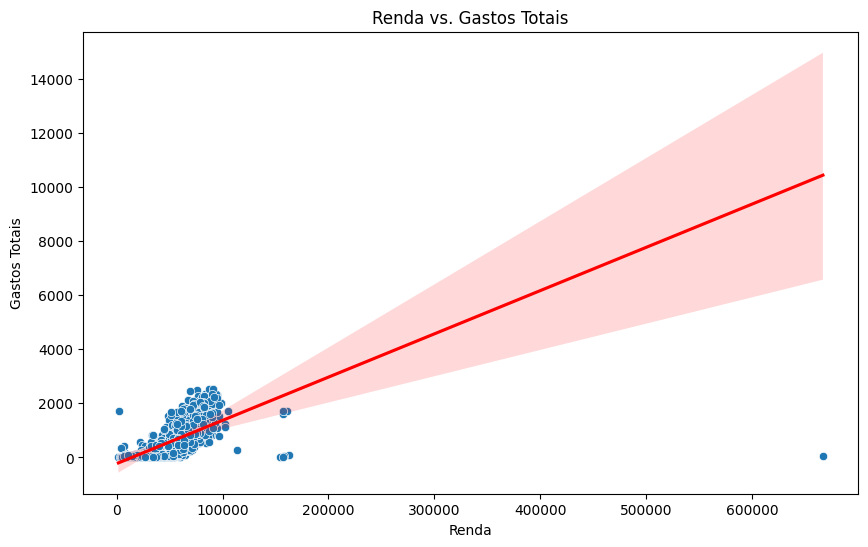

In [31]:
# Passo 6 - Análise
# 6.1 - Relação entre Renda e Gastos Totais
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Total_Spent', data=df_encoded)
sns.regplot(x='Income', y='Total_Spent', data=df_encoded, scatter=False, color='red')
plt.title('Renda vs. Gastos Totais')
plt.xlabel('Renda')
plt.ylabel('Gastos Totais')
plt.show()
# De maneira geral, esperamos que renda e gasto total possuam uma boa correlação em qualquer que seja o cenário,
# O gráfico confirma a correlação positiva alta especulada. (quão maior o ganho, maior a quantidade gasta).


C:\Users\henri\AppData\Local\Temp\ipykernel_26216\4286932684.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Kidhome', y='Total_Spent', data=df_encoded, ci=None)


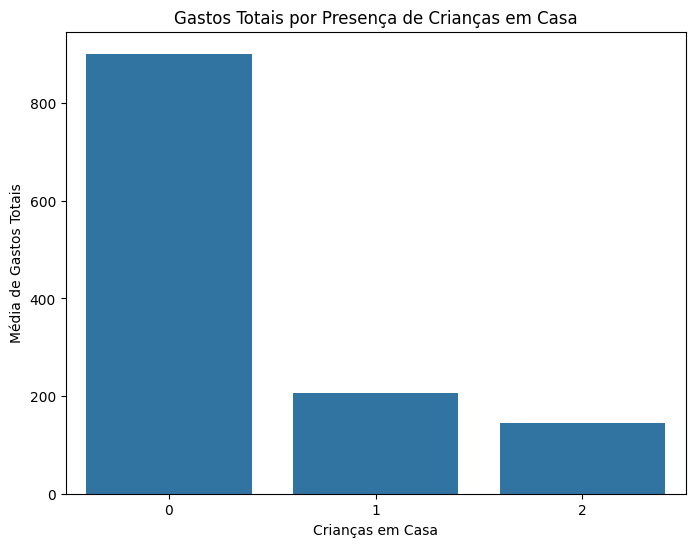

Kidhome
0    1293
1     899
2      48
Name: count, dtype: int64

In [37]:
# 6.2 - Gastos Totais por Presença de Crianças em Casa
plt.figure(figsize=(8, 6))
sns.barplot(x='Kidhome', y='Total_Spent', data=df_encoded, ci=None)
plt.title('Gastos Totais por Presença de Crianças em Casa')
plt.xlabel('Crianças em Casa')
plt.ylabel('Média de Gastos Totais')
plt.show()
df_encoded['Kidhome'].value_counts()
# Aqui um comportamento bem evidente é apontado: quanto menos crianças encontramos na casa maior o gasto da pessoa em nossas lojas.
# Apesar do aparecimento de 'doces' que é um produto bem aceito por crianças, o restante dos produtos condiz com um padrão de consumo de público adulto

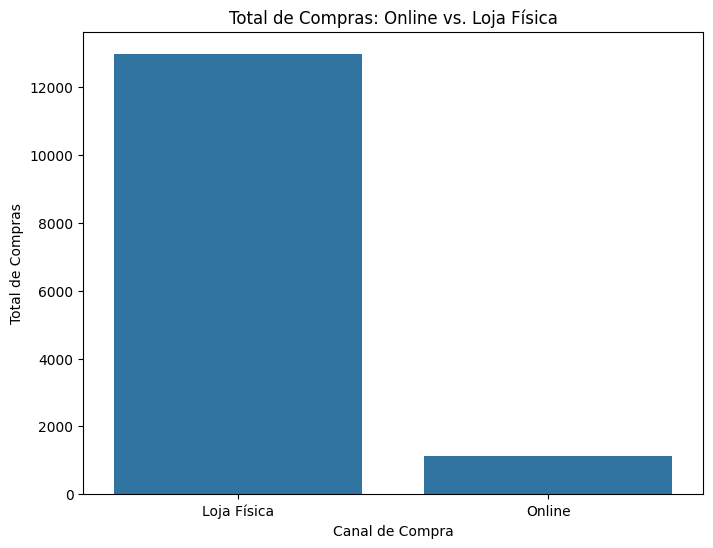

In [35]:
# 6.3 - Distribuição de Compras Online vs. Loja
purchase_counts = pd.DataFrame({
    'Tipo de Compra': ['Loja Física', 'Online'],
    'Total de Compras': [df_encoded['NumStorePurchases'].sum(), df_encoded['WebPurchases'].sum()]
})

plt.figure(figsize=(8, 6))
sns.barplot(x='Tipo de Compra', y='Total de Compras', data=purchase_counts)
plt.title('Total de Compras: Online vs. Loja Física')
plt.xlabel('Canal de Compra')
plt.ylabel('Total de Compras')
plt.show()
# Aqui vemos um padrão que pode ser considerado preocupante. Nossa loja apresenta um padrão de compra presencial muito impactante. 
# Isso pode ser resultado do perfil de produtos vendidos, por exemplo: 
# Pessoas tendem a experimentar joias de ouro antes de comprar;
# Peixes, carnes, frutas e doces (se feitos de maneira artesanal, o que eu proponho que seja o caso pelo nicho de loja) tendem a ser consumidos frescos
# para manutenção de qualidade, sabor, textura e aroma.
# Vinhos também tendem a ter valor agregado em compras presenciais (mas não na mesma proporção que os demais itens)
#(impacto visual da embalagem, facilidade de comparação de preço X teor alcoólico X tipo de vinho)

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








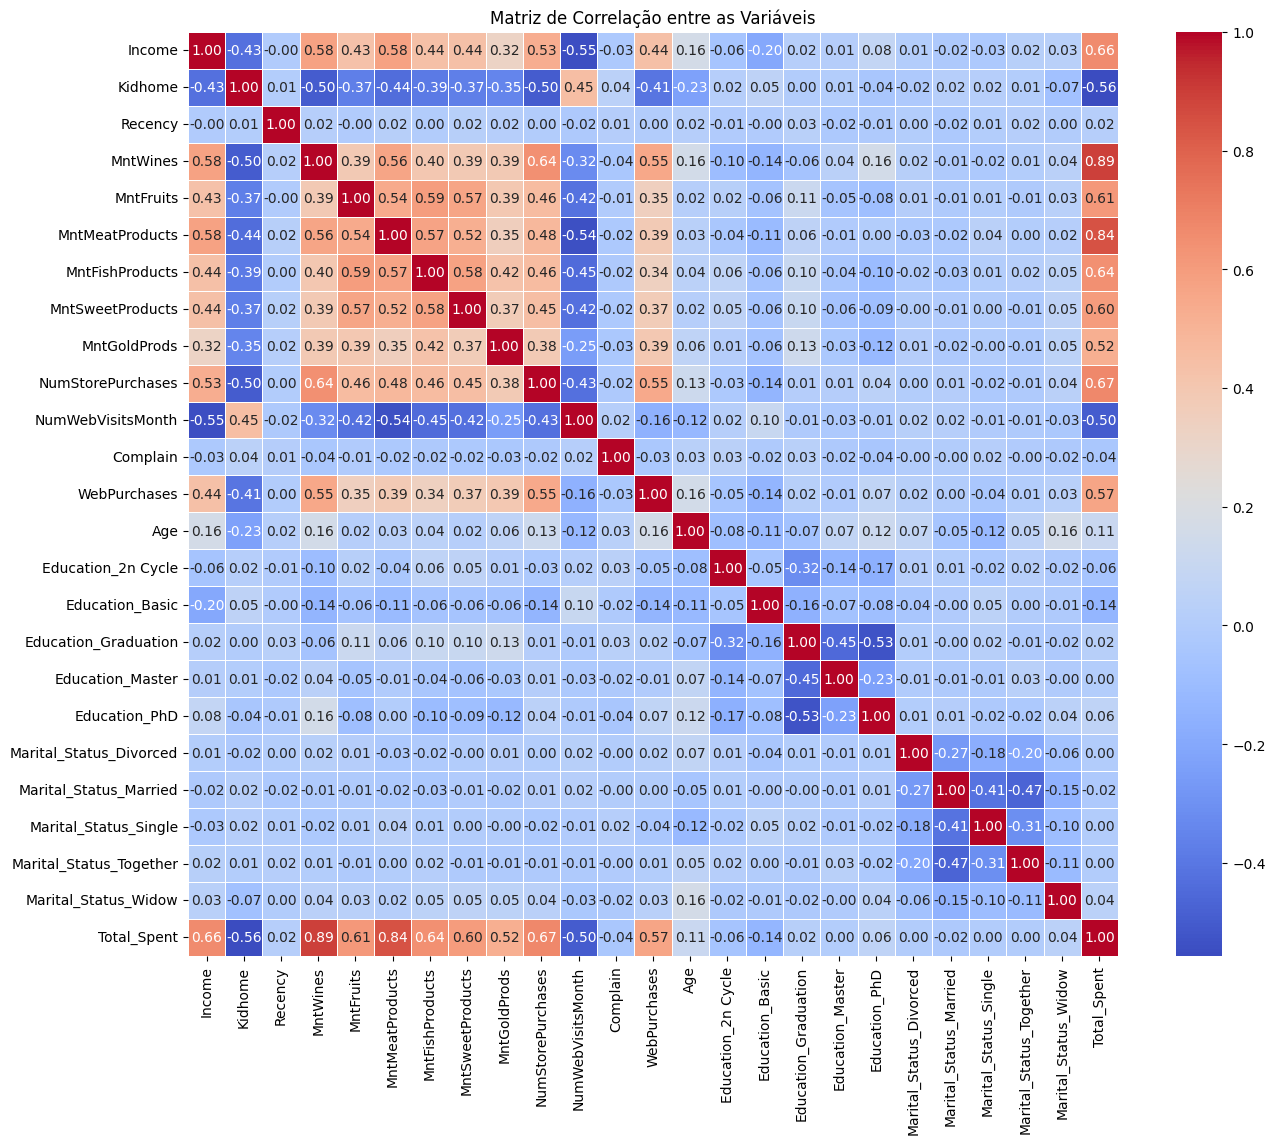

In [38]:
# Análise de correlação
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()
# Aqui 'total_Spent' (.57),'NumStorePurchases' (.55), 'MntWines' (.55), 'Income' (.44) foram as variáveis que mais apresentaram correlação positiva alta
# Com 'WebPurchases'.

In [43]:
# Separação base teste-treino
from sklearn.model_selection import train_test_split

Y = df_encoded['WebPurchases']
X = df_encoded.drop(columns=['WebPurchases'])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
print(f"Tamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")

Tamanho do conjunto de treino (X_train): (1680, 24)
Tamanho do conjunto de teste (X_test): (560, 24)


In [44]:
# Padronização dos dados numéricos
from sklearn.preprocessing import StandardScaler

colunas_para_padronizar = X_train.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X_train[colunas_para_padronizar] = scaler.fit_transform(X_train[colunas_para_padronizar])
X_test[colunas_para_padronizar] = scaler.transform(X_test[colunas_para_padronizar])

# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [47]:
# Primeiro modelo - Regressão logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

regressao = LogisticRegression(random_state=42)
regressao.fit(X_train, y_train)
y_pred_regressao = regressao.predict(X_test)

# Avaliação o modelo
print(classification_report(y_test, y_pred_regressao))

              precision    recall  f1-score   support

       False       0.79      0.82      0.80       253
        True       0.85      0.82      0.83       307

    accuracy                           0.82       560
   macro avg       0.82      0.82      0.82       560
weighted avg       0.82      0.82      0.82       560



In [49]:
# Segundo modelo - Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Avaliação o modelo
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

       False       0.94      0.87      0.90       253
        True       0.90      0.96      0.93       307

    accuracy                           0.92       560
   macro avg       0.92      0.91      0.91       560
weighted avg       0.92      0.92      0.92       560



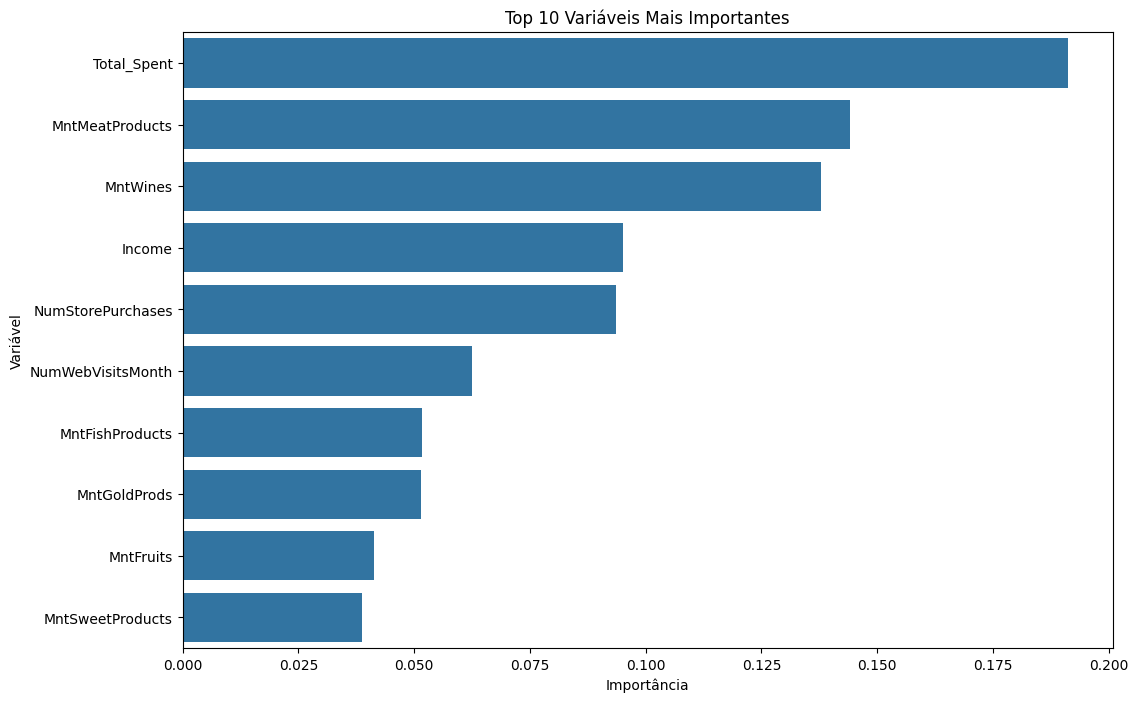

In [56]:
# Verificando importância das variáveis
importancia = rf.feature_importances_
df_importancias = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importancia
})

df_importancias = df_importancias.sort_values(by='importance', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=df_importancias.head(10))
plt.title('Top 10 Variáveis Mais Importantes')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.show()

# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.

In [64]:
# Matriz de cofusão - Regressão
from sklearn.metrics import classification_report, confusion_matrix

cm_log_reg = confusion_matrix(y_test, y_pred_regressao)
print("\nMatriz de Confusão - Regressão Logística:\n")
print(cm_log_reg)


Matriz de Confusão - Regressão Logística:

[[207  46]
 [ 55 252]]


In [65]:
# Matriz de cofusão - Random Forest
cm_log_rf = confusion_matrix(y_test, y_pred_rf)
print("\nMatriz de Confusão - Regressão Logística:\n")
print(cm_log_rf)


Matriz de Confusão - Regressão Logística:

[[219  34]
 [ 13 294]]


In [ ]:
# A matriz de confusão confirma que o modelo superior é Random Forest.
# a queda de 55 falsos negativos para 13 é gritante.